# Чтение данных

In [101]:
import matplotlib.pyplot as plt

In [11]:
import pandas as pd

train = pd.read_csv("data/train.tsv.zip")
test = pd.read_csv("data/test.tsv")
sample_submission = pd.read_csv("data/sample_submission.tsv")

In [44]:
train['is_train']=1
test['is_train']=0
full_data = pd.concat([train.reset_index(),test.reset_index()], axis=0, sort=False).drop(['index'], axis=1)
full_data.shape

(74473, 67)

# Генерация фичей

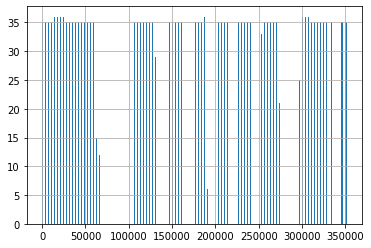

In [128]:
plt.show(full_data['Num'].hist(bins=10000))

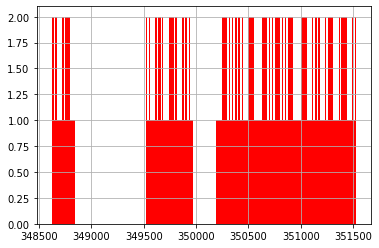

In [132]:
test['Num'].hist(bins=2016, color='red')
plt.show()

In [137]:
test['Num'].describe()

count      2016.000000
mean     350371.290675
std         806.372912
min      348622.000000
25%      349796.750000
50%      350520.500000
75%      351024.250000
max      351528.000000
Name: Num, dtype: float64

In [139]:
train['Num'].describe()

count     72457.000000
mean     178904.496129
std      103879.795910
min           0.000000
25%       89711.000000
50%      177658.000000
75%      270259.000000
max      349518.000000
Name: Num, dtype: float64

In [148]:
train.loc[train['Num']>348622]

,Num,y,year,week,shift,item_id,f1,f2,f3,f4,...,f52,f53,f54,f55,f56,f57,f58,f59,f60,is_train
72232,349294,2720,2015,2,1,20447918,820.0,1128.0,1801.0,1045.0,...,969.0,1635.0,895.0,2140.0,1182.0,1020.0,1293.0,1290.0,422.0,1
72233,349295,33182,2015,2,1,20447902,12585.0,11595.0,9685.0,12917.0,...,21195.0,18280.0,18270.0,15851.0,16920.0,18320.0,24116.0,21307.0,6661.0,1
72234,349296,275825,2015,2,1,20447732,147287.0,176065.0,143105.0,202069.0,...,221622.0,256605.0,240047.0,236630.0,206697.0,245652.0,286179.0,285904.0,54846.0,1
72235,349297,32835,2015,2,1,20443951,24420.0,27068.0,20460.0,25580.0,...,22450.0,22093.0,31175.0,23355.0,15358.0,18930.0,29643.0,33970.0,7787.0,1
72236,349298,16,2015,2,1,20443944,5864.0,3310.0,1853.0,2836.0,...,60.0,30.0,50.0,20.0,20.0,30.0,0.0,0.0,0.0,1
72237,349299,141147,2015,2,1,20443943,80036.0,112511.0,116002.0,171900.0,...,94634.0,91999.0,119165.0,96190.0,88666.0,118744.0,132368.0,117730.0,28229.0,1
72238,349300,87877,2015,2,1,20443941,30620.0,45886.0,49732.0,75195.0,...,63143.0,61417.0,63957.0,43027.0,53260.0,58029.0,62126.0,71857.0,17621.0,1
72239,349301,74890,2015,2,1,20443902,57637.0,54540.0,68171.0,64825.0,...,43432.0,52948.0,57199.0,60984.0,44887.0,58033.0,98839.0,76432.0,23853.0,1
72240,349302,78564,2015,2,1,20443901,56933.0,59899.0,67243.0,58880.0,...,45296.0,53534.0,58892.0,61250.0,54951.0,62347.0,106921.0,84194.0,23840.0,1
72241,349303,2604,2015,2,1,20443308,16070.0,14665.0,10640.0,20150.0,...,1610.0,2190.0,1464.0,1720.0,20460.0,1650.0,2568.0,1902.0,652.0,1


In [156]:
train.loc[train['item_id'] ==20447918].sort_values(by=['Num'], ascending=False).head()

,Num,y,year,week,shift,item_id,f1,f2,f3,f4,...,f52,f53,f54,f55,f56,f57,f58,f59,f60,is_train
72232,349294,2720,2015,2,1,20447918,820.0,1128.0,1801.0,1045.0,...,969.0,1635.0,895.0,2140.0,1182.0,1020.0,1293.0,1290.0,422.0,1
72007,348397,2720,2015,2,2,20447918,960.0,820.0,1128.0,1801.0,...,580.0,969.0,1635.0,895.0,2140.0,1182.0,1020.0,1293.0,1290.0,1
71786,348176,679,2015,1,1,20447918,960.0,820.0,1128.0,1801.0,...,580.0,969.0,1635.0,895.0,2140.0,1182.0,1020.0,1293.0,1290.0,1
71560,347278,2720,2015,2,3,20447918,961.0,960.0,820.0,1128.0,...,1510.0,580.0,969.0,1635.0,895.0,2140.0,1182.0,1020.0,1293.0,1
71339,347057,679,2015,1,2,20447918,961.0,960.0,820.0,1128.0,...,1510.0,580.0,969.0,1635.0,895.0,2140.0,1182.0,1020.0,1293.0,1


In [161]:
((test.loc[test['item_id'] ==20447918]==2720).sum()>0).sum()

0

In [163]:
test.max()

Num           351528.0
year            2015.0
week               5.0
shift              3.0
item_id     20453563.0
f1           2690913.0
f2           2690913.0
f3           2690913.0
f4           2803885.0
f5           2803885.0
f6           2803885.0
f7           2803885.0
f8           2803885.0
f9           2588016.0
f10          2588016.0
f11          3459224.0
f12          3459224.0
f13          3459224.0
f14          3459224.0
f15          3459224.0
f16          2251176.0
f17          2623276.0
f18          2623276.0
f19          2623276.0
f20          2623276.0
f21          2623276.0
f22          2225350.0
f23          2225350.0
f24          2225350.0
f25          2679487.0
               ...    
f32          2690913.0
f33          2690913.0
f34          2803885.0
f35          2803885.0
f36          2803885.0
f37          2803885.0
f38          2803885.0
f39          2588016.0
f40          2588016.0
f41          3459224.0
f42          3459224.0
f43          3459224.0
f44        

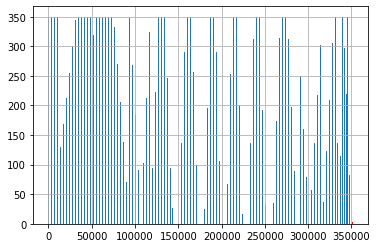

In [123]:
train['Num'].hist(bins=1000)
test['Num'].hist(bins=1000, color='red')
plt.show()

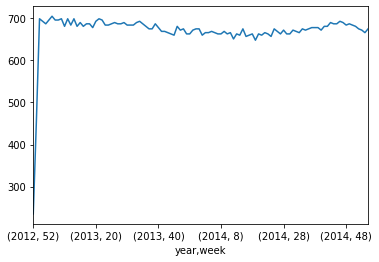

In [114]:
train.groupby(by=['year', 'week'])['Num'].count().plot()

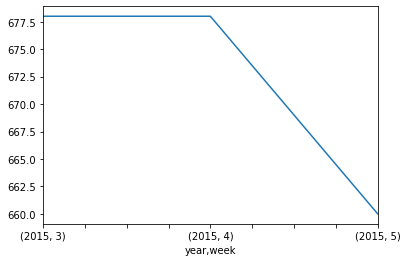

In [131]:
test.groupby(by=['year', 'week'])['Num'].count().plot()

# Разбиение на подвыборки

In [45]:
from sklearn.model_selection import train_test_split

dev,valid = train_test_split(full_data.loc[full_data['is_train']==1],test_size=0.3)

In [47]:
dev_y = dev['y']
dev_X = dev.drop(['y', 'is_train'],axis=1)

valid_y = valid['y']
valid_X = valid.drop(['y', 'is_train'],axis=1)

In [49]:
test_X = full_data.loc[full_data['is_train']==0].drop(['y', 'is_train'], axis=1)

# Построение модели

In [55]:
import lightgbm as lgbm
import numpy as np
from sklearn.metrics import mean_absolute_error

In [71]:
def smape(f,a):
    top = np.fabs(f-a)
    bot = (np.fabs(f) + np.fabs(a))/2
    return np.sum(100/len(a) * top/bot)

In [83]:
reg = lgbm.LGBMRegressor(objective='rmse', n_estimators=200)
reg.fit(dev_X, dev_y)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=200, n_jobs=-1, num_leaves=31, objective='rmse',
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [84]:
reg.evals_result_

In [85]:
valid_predictions = reg.predict(valid_X)
dev_predictions = reg.predict(dev_X)
print(smape(valid_predictions, valid_y))
print(smape(dev_predictions, dev_y))

38.349330905160656
37.83515301805488


In [87]:
test_predictions = reg.predict(test_X)

In [88]:
sample_submission['y']=test_predictions

In [ ]:
sample_submission.to_csv()